___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import (classification_report, confusion_matrix ,RocCurveDisplay,
    roc_auc_score, roc_curve ,
    accuracy_score, 
    precision_recall_curve,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc)
from scikitplot.metrics import plot_roc, precision_recall_curve,plot_precision_recall 
from sklearn.metrics import PrecisionRecallDisplay


from sklearn.model_selection import cross_val_score, cross_validate
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint, Callback
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
from scipy.stats import skew
from sklearn.ensemble import RandomForestClassifier
from keras import backend as K
from tensorflow.keras.layers import Dropout


%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

In [2]:


# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import tensorflow as tf

tf.__version__

'2.14.0'

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df=pd.read_csv('1-Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
#drop row number and customerid
df.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [10]:
df.describe().T
#drop row number and customerid

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [11]:
df.describe(include='O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [12]:
df.drop(['Surname'], axis=1,inplace=True)

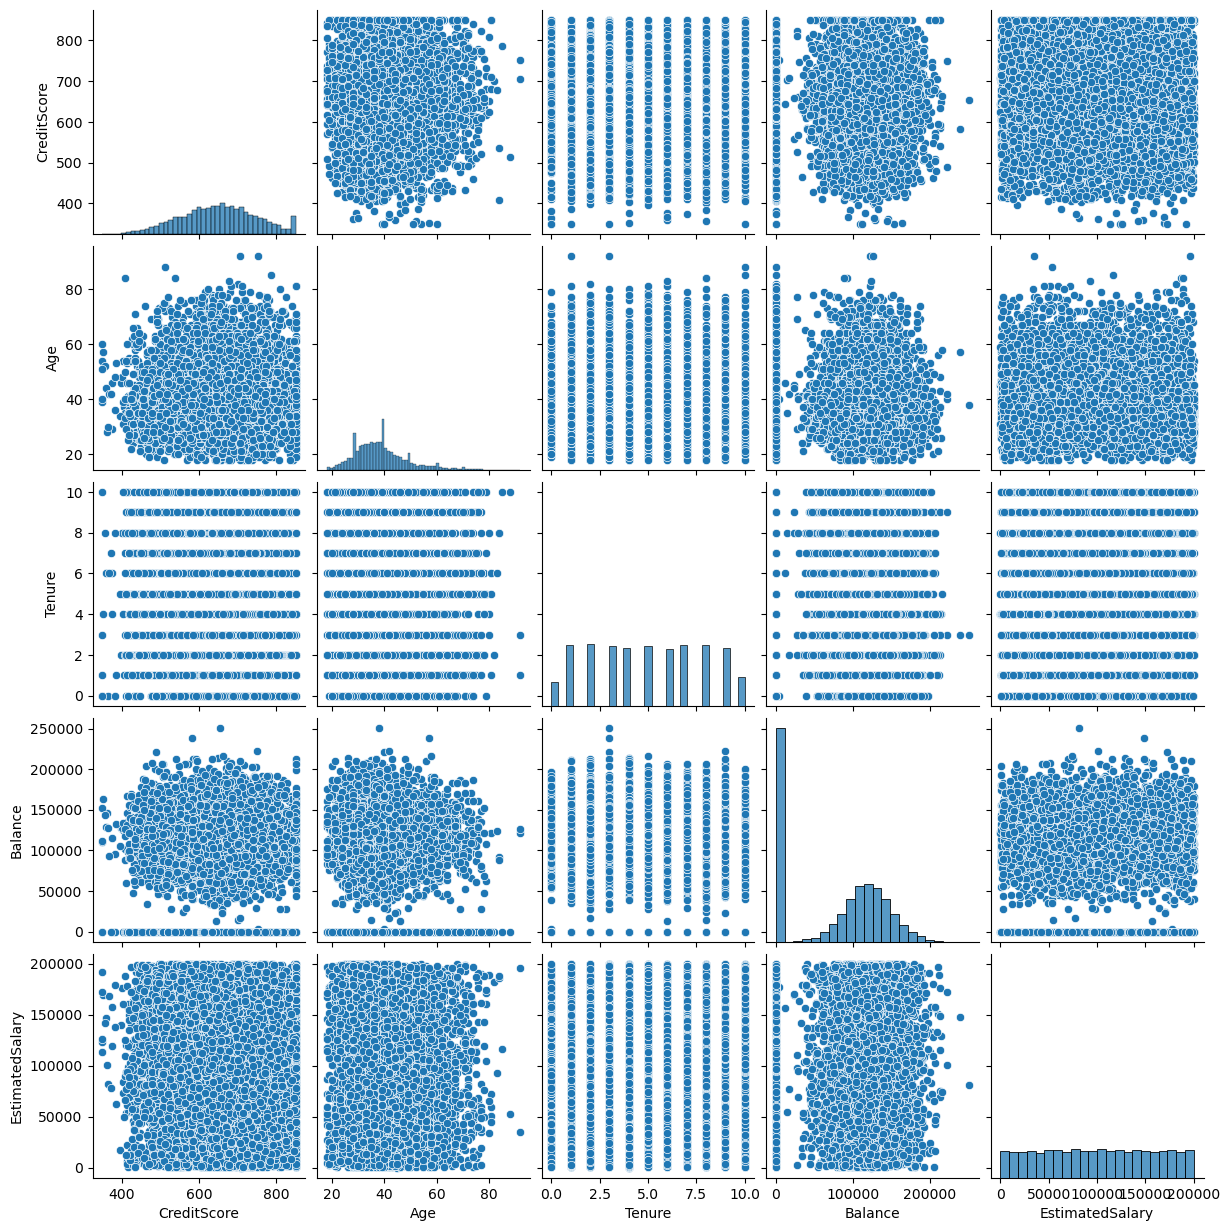

In [13]:
sns.pairplot(df.drop(['Exited','Gender','Geography','IsActiveMember','HasCrCard','NumOfProducts'], axis=1))
plt.show()

In [14]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

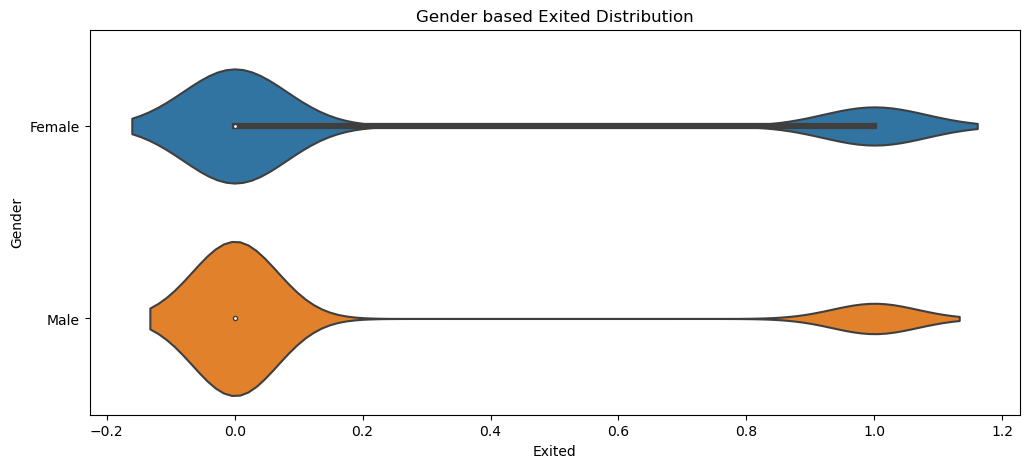

In [15]:
plt.figure(figsize=(12, 5))
sns.violinplot(x='Exited', y='Gender', data=df, orient="h")
plt.title('Gender based Exited Distribution')
plt.show()

In [16]:
numeric_df = df.select_dtypes(include='number')

numeric_df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


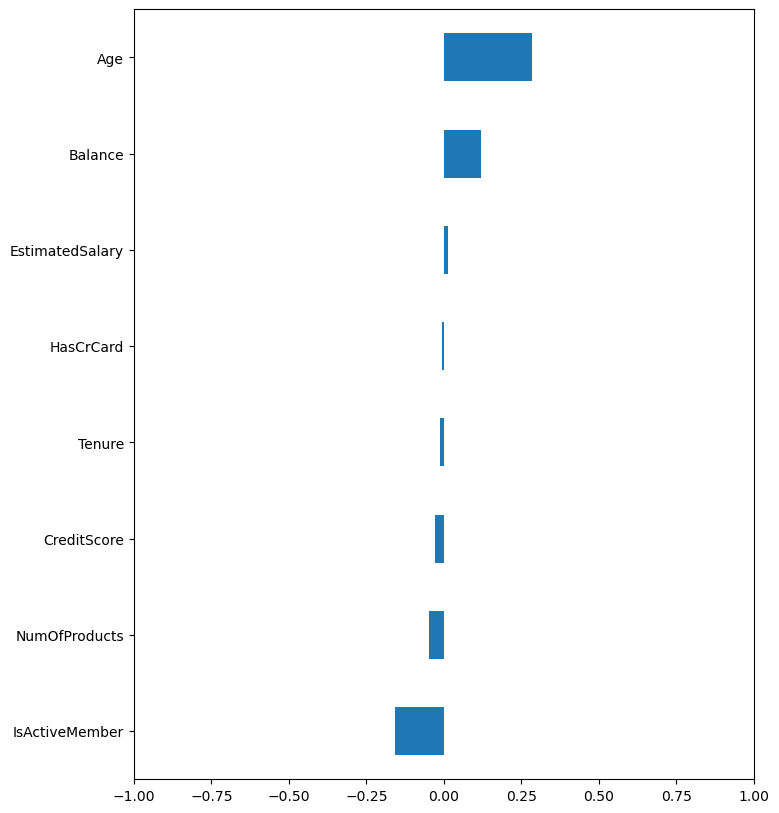

In [17]:
plt.figure(figsize=(8, 10))
ax = (df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited")).plot(kind="barh")
ax.set_xlim([-1, 1])
plt.show()

<Axes: >

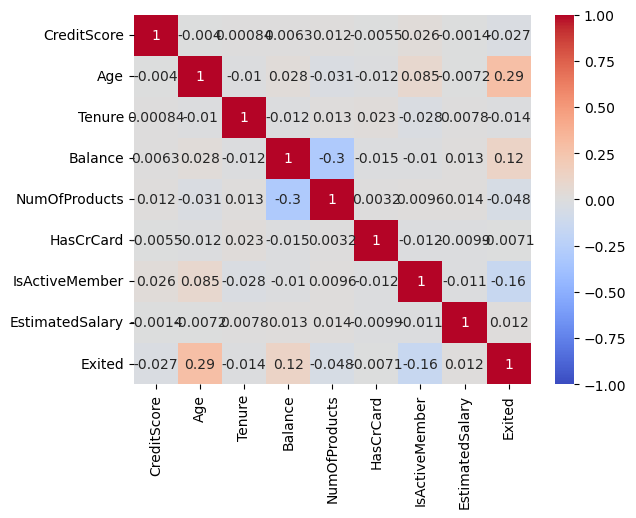

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")

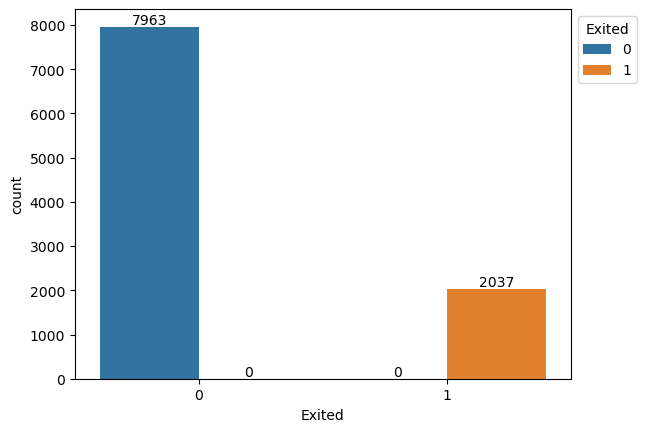

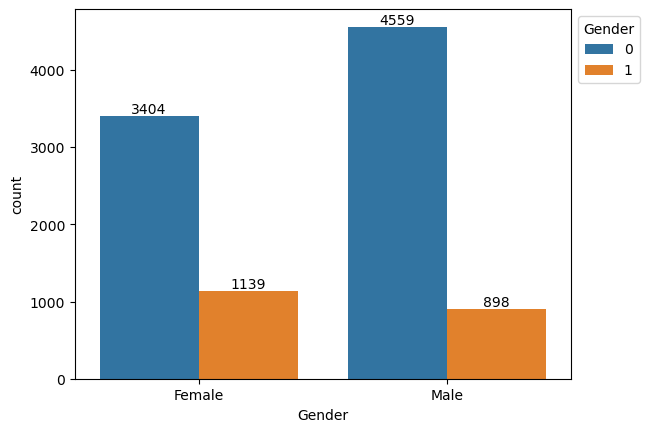

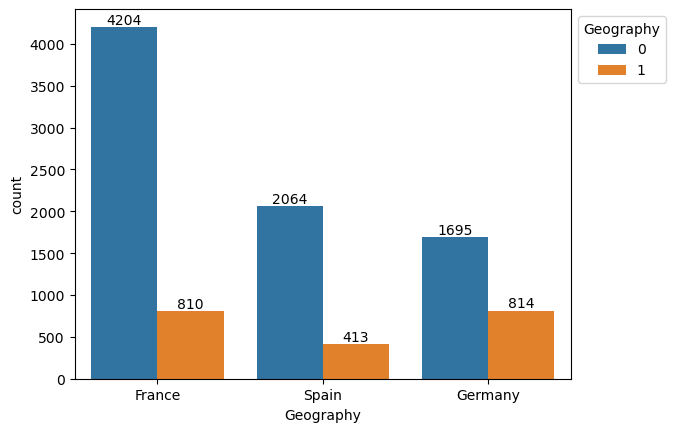

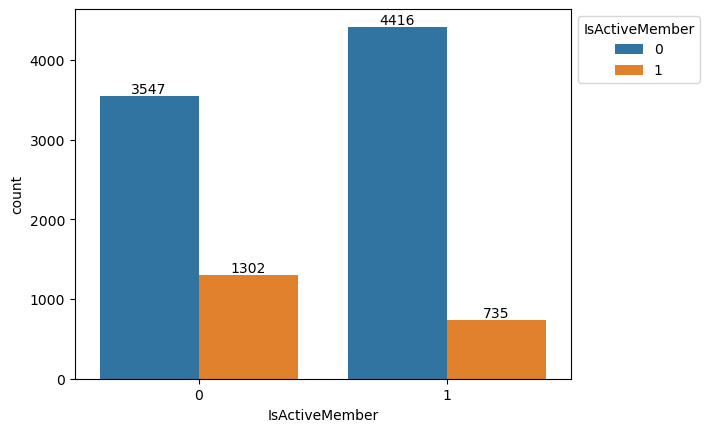

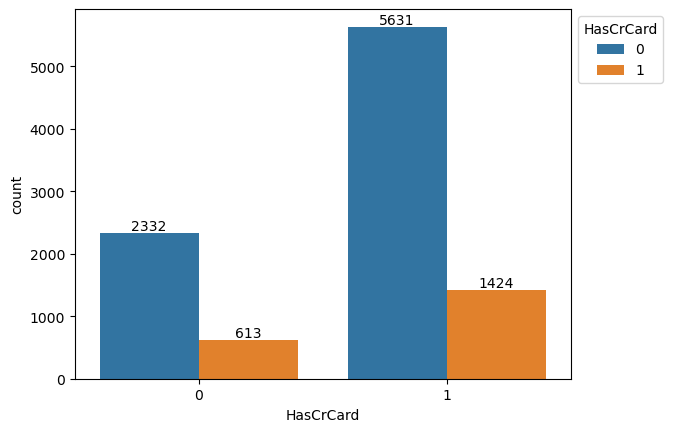

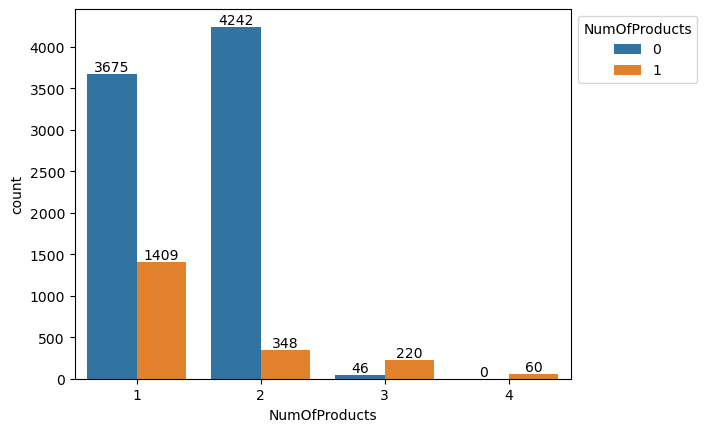

In [19]:
df_plot=df[['Exited','Gender','Geography','IsActiveMember','HasCrCard','NumOfProducts']]
for column in df_plot.columns:
    # Create the countplot for the current column
    p = sns.countplot(data=df_plot, x=column, hue='Exited')

    # Configure the legend
    p.legend(title=column, bbox_to_anchor=(1, 1), loc='upper left')

    # Add labels to the bars
    for c in p.containers:
        p.bar_label(c, fmt='%.0f', label_type='edge')

    # Display the plot
    plt.show()

In [20]:
df.groupby(['Exited']).count()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


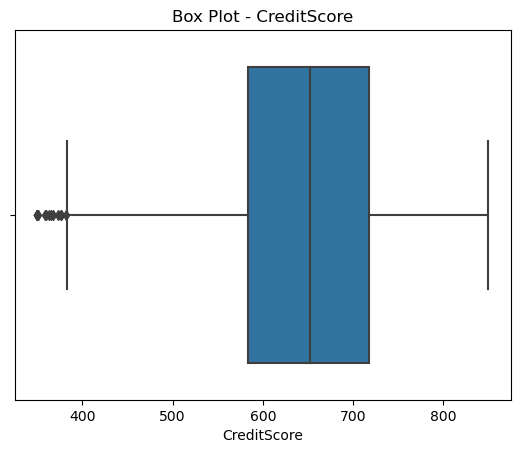

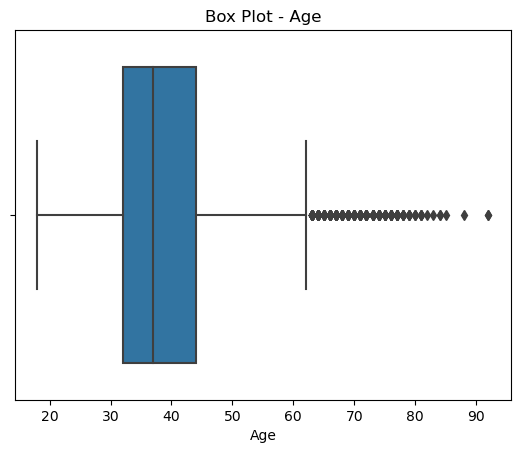

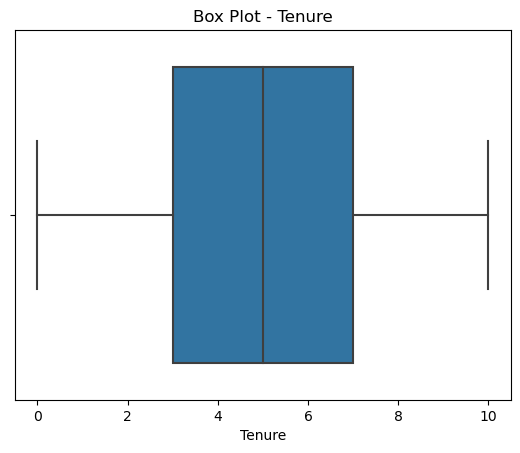

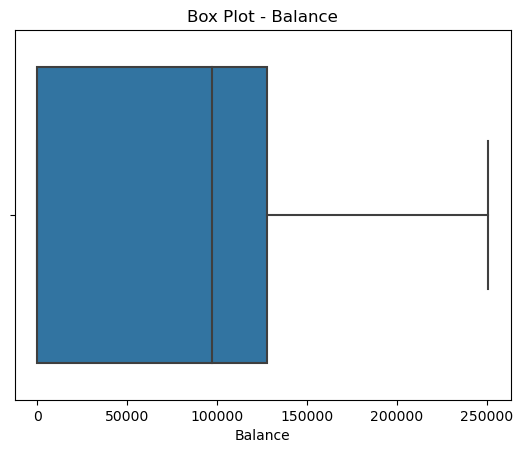

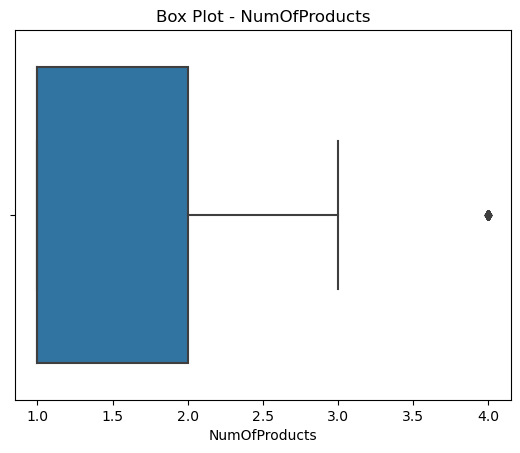

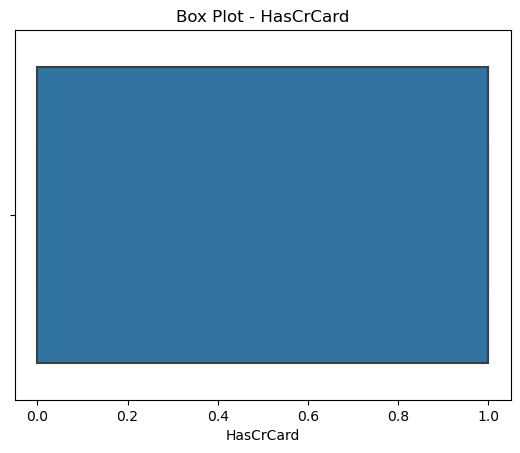

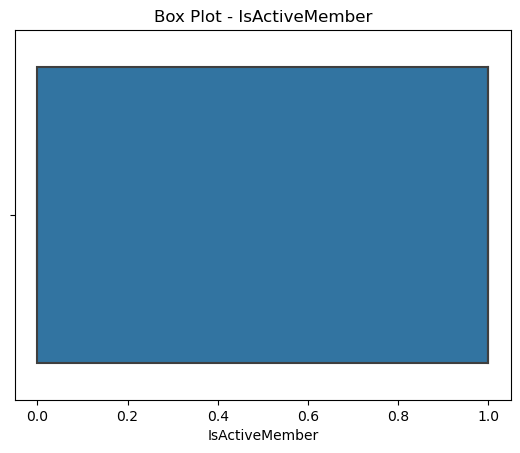

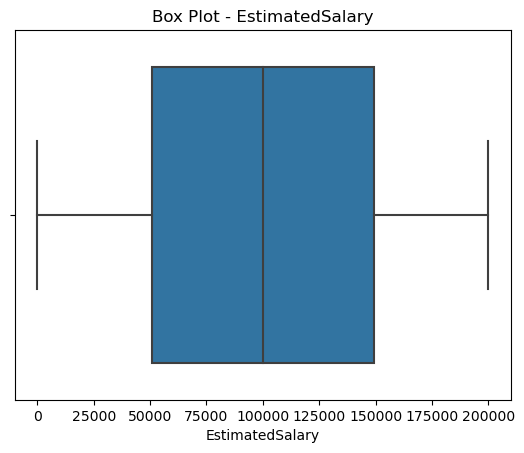

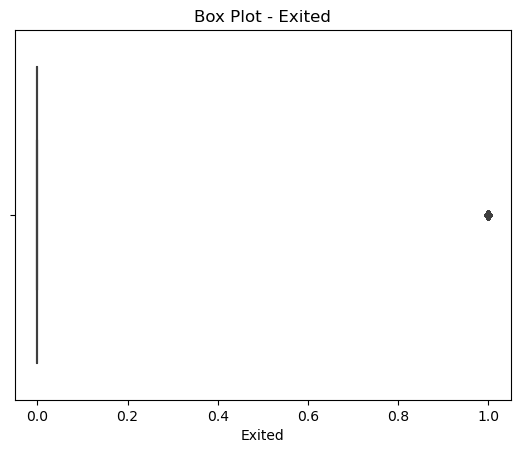

In [21]:
for column in df.columns:
    # Check if the column is numeric
    if df[column].dtype in ['int64', 'float64']:
        # Create the box plot for the current column
        sns.boxplot(data=df, x=column)

        # Set the title of the plot
        plt.title(f'Box Plot - {column}')

        # Display the plot
        plt.show()

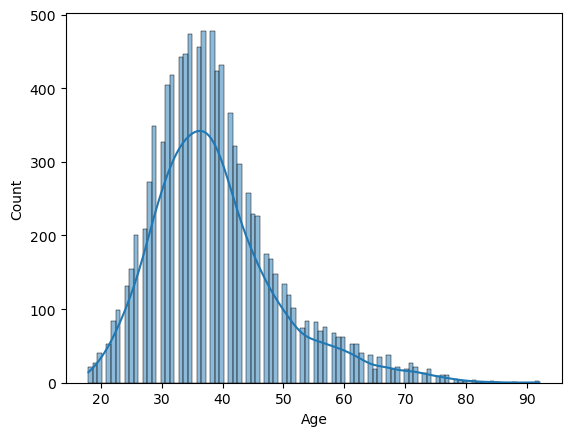

In [22]:
sns.histplot(df.Age, bins=100, kde=True);

# i tried to keep the values until 85 but class 1 decreased

In [23]:
skew(df["Age"])

1.0111685586628079

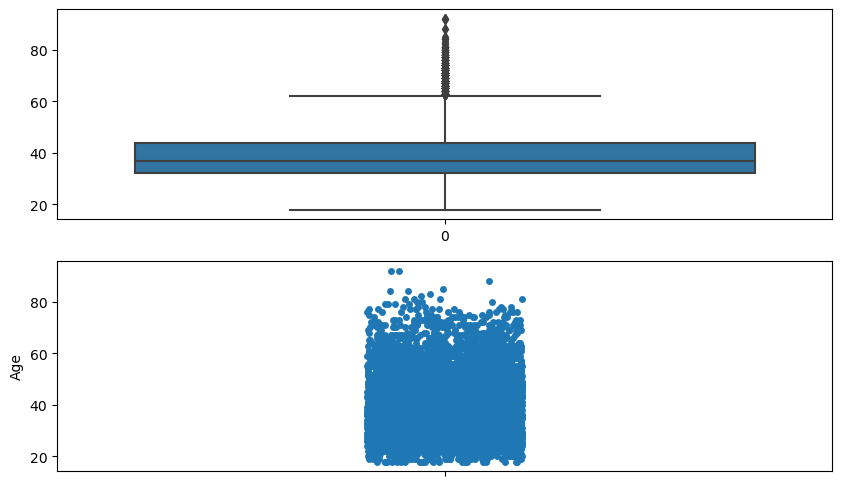

In [24]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.Age)

plt.subplot(212)
sns.stripplot(df.Age);

In [25]:
df['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Preprocessing of Data
- Train | Test Split, Scalling

In [26]:
X=df.drop(['Exited'],axis=1)
y=df['Exited']

In [27]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [28]:
seed=42

In [31]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=seed,stratify=y,)

In [33]:
print(X_train_val.shape)
print(y_train_val.shape)

(8500, 10)
(8500,)


In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=seed)

In [37]:
X_train.shape

(7650, 10)

In [38]:
y_train.shape

(7650,)

In [39]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1991,626,Germany,Male,36,2,181671.16,2,1,1,57531.14
8345,568,Spain,Female,46,3,0.00,2,1,1,29372.62
7844,612,France,Female,38,1,0.00,2,1,1,9209.21
9086,647,Spain,Female,29,2,0.00,2,1,0,179032.68
9714,726,Spain,Female,56,2,105473.74,1,1,1,46044.70
...,...,...,...,...,...,...,...,...,...,...
239,703,France,Male,28,2,81173.83,2,0,1,162812.16
624,477,Spain,Female,48,2,129120.64,1,0,1,26475.79
1475,634,France,Male,26,8,0.00,1,1,0,21760.96
943,675,Germany,Female,29,8,121326.42,1,1,0,133457.52


In [40]:
y_train.value_counts()

Exited
0    6098
1    1552
Name: count, dtype: int64

In [41]:
cat_onehot = ['Geography', 'Gender']


In [44]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough"
)

# Create a pipeline
operations = [("encoder", column_trans), ("scaler", MinMaxScaler())]
pipe_model = Pipeline(steps=operations)

# Transform the data
X_train_transformed = pipe_model.fit_transform(X_train)
X_val_transformed = pipe_model.transform(X_val)
X_test_transformed = pipe_model.transform(X_test)


# Modelling & Model Performance

## without class_weigth

### Create The Model

In [45]:
tf.random.set_seed(seed)

model = Sequential()


model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train_transformed.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

# Fit the model


In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 18)                594       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 6)                 60        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1280 (5.00 KB)
Trainable params: 1280 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model.fit(x=X_train_transformed, y=y_train,validation_data=(X_val_transformed, y_val), epochs=1000, batch_size=30)

Epoch 1/1000
255/255 [==============================] - 2s 4ms/step - loss: 0.4926 - recall: 0.0000e+00 - val_loss: 0.4836 - val_recall: 0.0000e+00
Epoch 2/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.4570 - recall: 0.0161 - val_loss: 0.4636 - val_recall: 0.0335
Epoch 3/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.4382 - recall: 0.1353 - val_loss: 0.4509 - val_recall: 0.2514
Epoch 4/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.4220 - recall: 0.2313 - val_loss: 0.4242 - val_recall: 0.2793
Epoch 5/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.4059 - recall: 0.3009 - val_loss: 0.4173 - val_recall: 0.2682
Epoch 6/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.3980 - recall: 0.3363 - val_loss: 0.4008 - val_recall: 0.3520
Epoch 7/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.3874 - recall: 0.3505 - val_loss: 0.3882 - val_recall: 0.3631
Epoch 8/1000

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [49]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 32) dtype=float32, numpy=
 array([[ 4.85944033e-01,  9.43420827e-02,  5.77308953e-01,
          7.46484101e-01, -7.51091897e-01, -3.44622254e-01,
         -1.70499280e-01,  1.13990337e-01, -2.10335046e-01,
          3.16137135e-01,  3.46611530e-01,  2.55908728e-01,
         -1.30986881e+00, -1.84410438e-02,  7.15909302e-01,
          7.32593954e-01, -2.04564139e-01,  3.01588804e-01,
         -1.43553242e-01, -3.20173763e-02,  4.64739472e-01,
          2.29052037e-01, -1.18545882e-01, -9.34560522e-02,
         -1.44100165e+00,  4.71423492e-02, -1.86997503e-01,
          3.50971162e-01,  4.35915798e-01,  1.44499615e-01,
          3.33106488e-01, -3.70124467e-02],
        [-4.31576908e-01,  4.78698075e-01, -2.93852966e-02,
         -4.66878384e-01, -3.53107035e-01,  7.30069697e-01,
          4.27755974e-02, -5.75140297e-01, -3.26707512e-01,
          2.83721596e-01, -9.93128046e-02, -2.66251326e-01,
          3.16669583e-01,  1.78771868e-01, -4.40

In [50]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.492615,0.000000,0.483637,0.000000
1,0.456978,0.016108,0.463588,0.033520
2,0.438227,0.135309,0.450885,0.251397
3,0.421961,0.231314,0.424167,0.279330
4,0.405923,0.300902,0.417313,0.268156


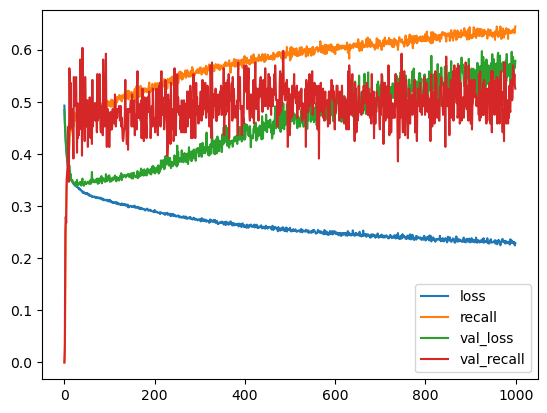

In [51]:
loss_df.plot()
plt.show()

In [52]:
loss, recall = model.evaluate(X_test_transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.6251910924911499
recall:  0.4673202633857727


In [53]:
y_pred = model.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[1120   74]
 [ 163  143]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1194
           1       0.66      0.47      0.55       306

    accuracy                           0.84      1500
   macro avg       0.77      0.70      0.73      1500
weighted avg       0.83      0.84      0.83      1500



47/47 [==============================] - 0s 2ms/step


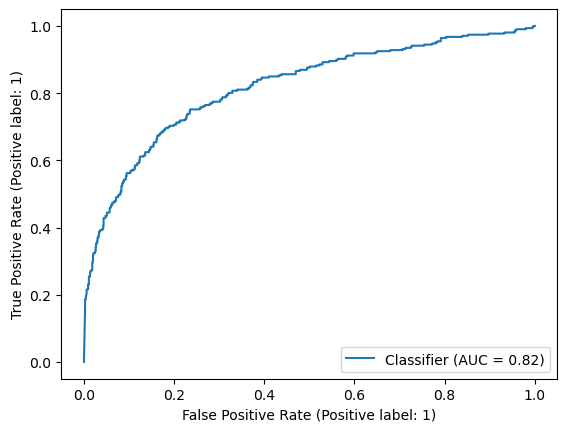

In [54]:
y_pred_proba = model.predict(X_test_transformed) # > 0.5 ?
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [55]:
roc_auc_score(y_test, y_pred_proba)

0.8181566875773203

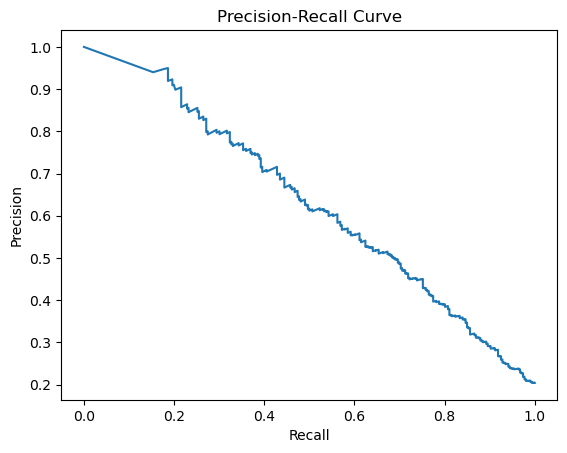

In [56]:
#since we have imbalanced data using precision_recall more reliable
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [57]:
class_weights = {0: 1.0, 1: 2.0} 

In [58]:
tf.random.set_seed(seed)

model1 = Sequential()


model1 = Sequential()
model1.add(Dense(32, activation="relu", input_dim=X_train_transformed.shape[1]))
model1.add(Dense(18, activation="relu"))
model1.add(Dense(9, activation="relu"))
model1.add(Dense(6, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [59]:
model1.fit(X_train_transformed, y_train,validation_data=(X_val_transformed, y_val), epochs=1000, batch_size=30,class_weight=class_weights)

Epoch 1/1000
255/255 [==============================] - 2s 4ms/step - loss: 0.7642 - recall: 0.1585 - val_loss: 0.4996 - val_recall: 0.2291
Epoch 2/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.6742 - recall: 0.3589 - val_loss: 0.5018 - val_recall: 0.4525
Epoch 3/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.6493 - recall: 0.4394 - val_loss: 0.5221 - val_recall: 0.6034
Epoch 4/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.6360 - recall: 0.4568 - val_loss: 0.4815 - val_recall: 0.5475
Epoch 5/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.6175 - recall: 0.4968 - val_loss: 0.4295 - val_recall: 0.4246
Epoch 6/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.6022 - recall: 0.5193 - val_loss: 0.4381 - val_recall: 0.5754
Epoch 7/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.5802 - recall: 0.5451 - val_loss: 0.4100 - val_recall: 0.5531
Epoch 8/1000
255/255

In [60]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                448       
                                                                 
 dense_6 (Dense)             (None, 18)                594       
                                                                 
 dense_7 (Dense)             (None, 9)                 171       
                                                                 
 dense_8 (Dense)             (None, 6)                 60        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1280 (5.00 KB)
Trainable params: 1280 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [61]:
loss_df = pd.DataFrame(model1.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.764167,0.158505,0.499646,0.229050
1,0.674198,0.358892,0.501758,0.452514
2,0.649299,0.439433,0.522109,0.603352
3,0.636033,0.456830,0.481538,0.547486
4,0.617495,0.496778,0.429530,0.424581


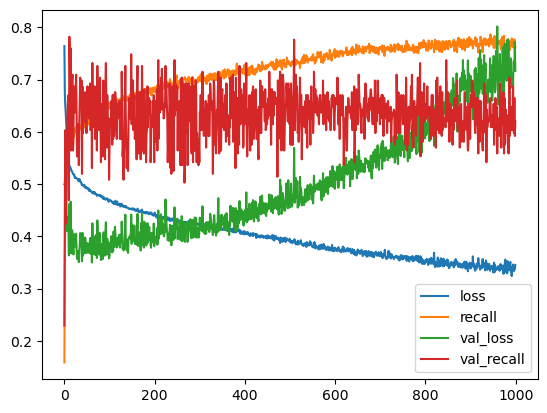

In [62]:
loss_df.plot()
plt.show()

In [63]:
loss, recall = model1.evaluate(X_test_transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.7312252521514893
recall:  0.5915032625198364


In [64]:
y_pred = model1.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 3ms/step
[[1026  168]
 [ 125  181]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1194
           1       0.52      0.59      0.55       306

    accuracy                           0.80      1500
   macro avg       0.71      0.73      0.71      1500
weighted avg       0.82      0.80      0.81      1500



47/47 [==============================] - 0s 3ms/step


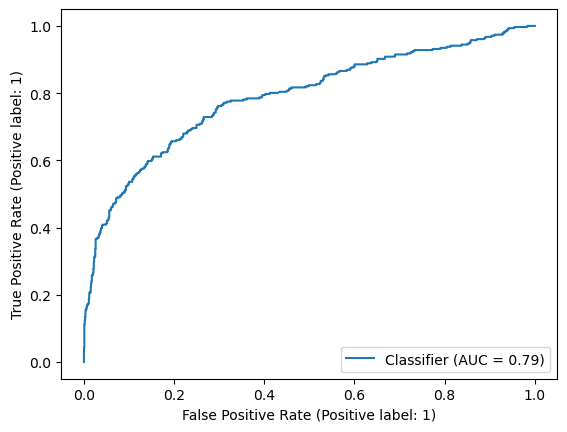

In [65]:
y_pred_proba = model1.predict(X_test_transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [66]:
roc_auc_score(y_test, y_pred_proba)

0.7890487294862111

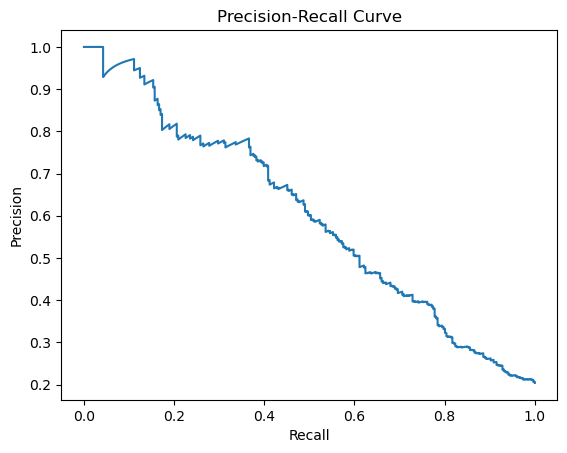

In [67]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [68]:
tf.random.set_seed(seed)


model2 = Sequential()
model2.add(Dense(32, activation="relu", input_dim=X_train_transformed.shape[1]))
model2.add(Dense(18, activation="relu"))
model2.add(Dense(9, activation="relu"))
model2.add(Dense(6, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model2.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [69]:
model2.fit(X_train_transformed, y_train,validation_data=(X_val_transformed, y_val), epochs=1000, batch_size=30,class_weight=class_weights)

Epoch 1/1000
255/255 [==============================] - 4s 6ms/step - loss: 0.6973 - recall: 0.2738 - val_loss: 0.4706 - val_recall: 0.3799
Epoch 2/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.6470 - recall: 0.4568 - val_loss: 0.4943 - val_recall: 0.5978
Epoch 3/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.5808 - recall: 0.5477 - val_loss: 0.4039 - val_recall: 0.6648
Epoch 4/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.5418 - recall: 0.5941 - val_loss: 0.3833 - val_recall: 0.6480
Epoch 5/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.5285 - recall: 0.6018 - val_loss: 0.3390 - val_recall: 0.5587
Epoch 6/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.5301 - recall: 0.6044 - val_loss: 0.3618 - val_recall: 0.5978
Epoch 7/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.5208 - recall: 0.5992 - val_loss: 0.3723 - val_recall: 0.6425
Epoch 8/1000
255/255

In [70]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.697320,0.273840,0.470563,0.379888
1,0.647048,0.456830,0.494336,0.597765
2,0.580809,0.547680,0.403908,0.664804
3,0.541825,0.594072,0.383337,0.648045
4,0.528488,0.601804,0.339014,0.558659


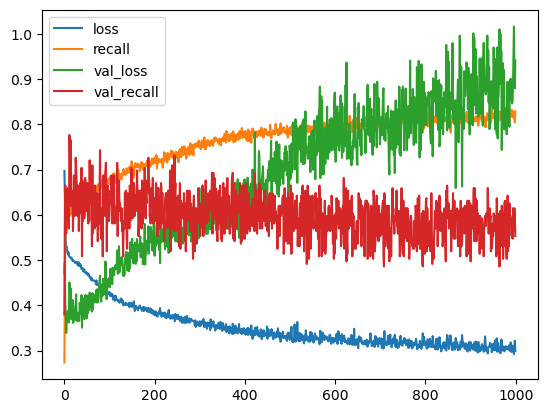

In [71]:
loss_df.plot()
plt.show()

In [72]:
loss, recall = model2.evaluate(X_test_transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.917150616645813
recall:  0.5522875785827637


In [73]:
y_pred = model2.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 3ms/step
[[1031  163]
 [ 137  169]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1194
           1       0.51      0.55      0.53       306

    accuracy                           0.80      1500
   macro avg       0.70      0.71      0.70      1500
weighted avg       0.81      0.80      0.80      1500



47/47 [==============================] - 0s 3ms/step


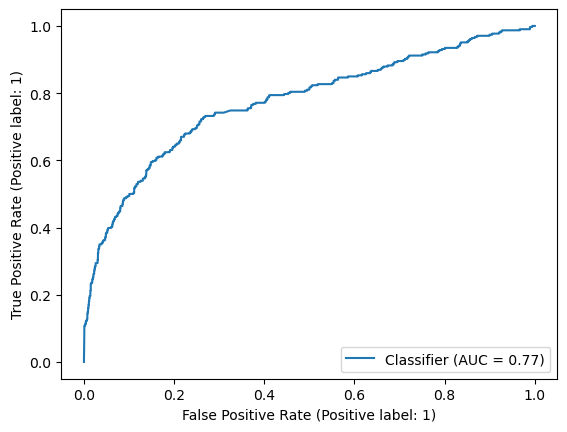

In [74]:
y_pred_proba = model2.predict(X_test_transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [75]:
roc_auc_score(y_test, y_pred_proba)

0.7741320984004992

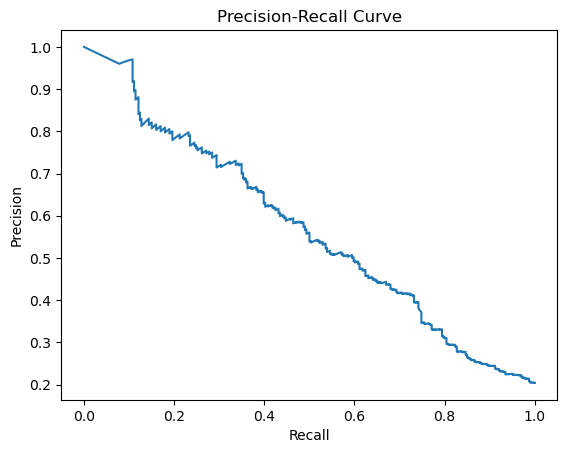

In [76]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Add Dropout Layer

In [77]:
from tensorflow.keras.layers import Dropout

In [78]:
tf.random.set_seed(seed)

model3 = Sequential()
model3.add(Dense(32, activation="relu", input_dim=X_train_transformed.shape[1]))
model3.add(Dropout(0.2))

model3.add(Dense(18, activation="relu"))
model3.add(Dropout(0.2))

model3.add(Dense(9, activation="relu"))
model3.add(Dropout(0.2))

model3.add(Dense(1, activation="sigmoid"))


opt = Adam(learning_rate=0.001)
model3.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [79]:
model3.fit(X_train_transformed, y_train,validation_data=(X_val_transformed, y_val), epochs=1000, batch_size=30,class_weight=class_weights)

Epoch 1/1000
255/255 [==============================] - 4s 6ms/step - loss: 0.7708 - recall: 0.0316 - val_loss: 0.5303 - val_recall: 0.0000e+00
Epoch 2/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.7378 - recall: 0.0284 - val_loss: 0.5138 - val_recall: 0.0223
Epoch 3/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.7201 - recall: 0.1772 - val_loss: 0.5210 - val_recall: 0.3631
Epoch 4/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.7003 - recall: 0.3280 - val_loss: 0.5122 - val_recall: 0.4637
Epoch 5/1000
255/255 [==============================] - 1s 5ms/step - loss: 0.6762 - recall: 0.4085 - val_loss: 0.4661 - val_recall: 0.3855
Epoch 6/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.6632 - recall: 0.4195 - val_loss: 0.4659 - val_recall: 0.5028
Epoch 7/1000
255/255 [==============================] - 1s 5ms/step - loss: 0.6434 - recall: 0.4916 - val_loss: 0.4425 - val_recall: 0.5140
Epoch 8/1000
255

In [80]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.770803,0.031572,0.530326,0.000000
1,0.737813,0.028351,0.513829,0.022346
2,0.720117,0.177191,0.520989,0.363128
3,0.700309,0.327964,0.512180,0.463687
4,0.676227,0.408505,0.466074,0.385475


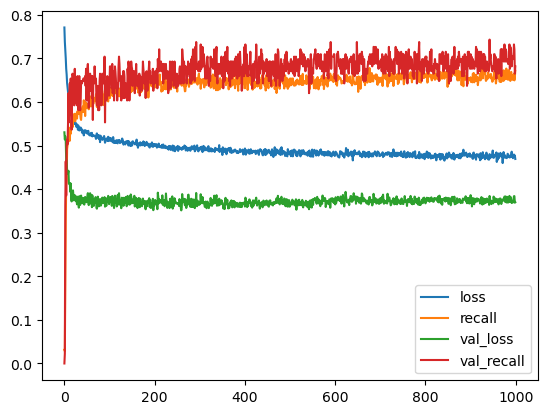

In [81]:
loss_df.plot()
plt.show()

In [82]:
loss, recall = model3.evaluate(X_test_transformed, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.3813210427761078
recall:  0.6241829991340637


In [83]:
y_pred = model3.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 4ms/step
[[1088  106]
 [ 115  191]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1194
           1       0.64      0.62      0.63       306

    accuracy                           0.85      1500
   macro avg       0.77      0.77      0.77      1500
weighted avg       0.85      0.85      0.85      1500



47/47 [==============================] - 0s 3ms/step


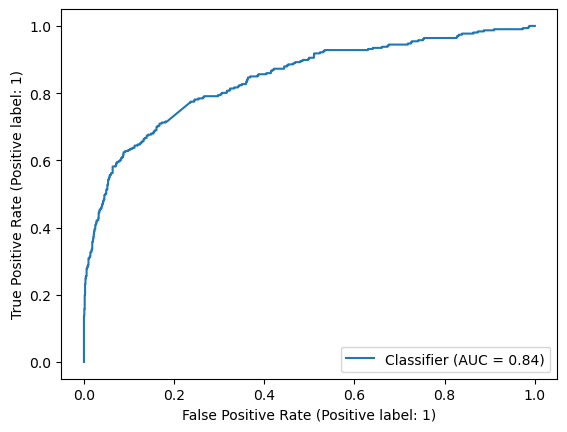

In [84]:
y_pred_proba = model3.predict(X_test_transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [85]:
roc_auc_score(y_test, y_pred_proba)

0.8431263069158428

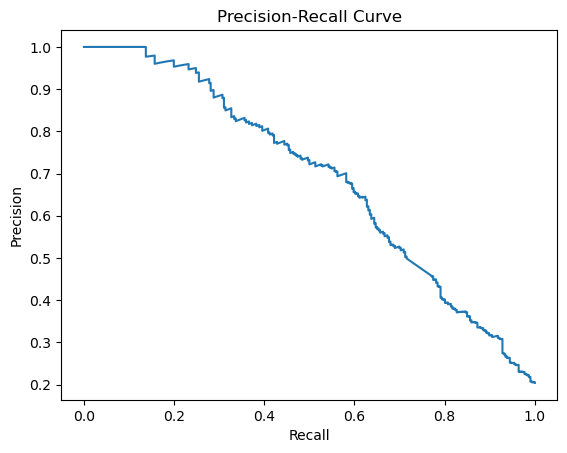

In [86]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Add Early Stop

#### Monitor the "val_loss" as metric

In [87]:
tf.random.set_seed(seed)


model4 = Sequential()
model4.add(Dense(32, activation="relu", input_dim=X_train_transformed.shape[1]))
model4.add(Dense(18, activation="relu"))
model4.add(Dense(9, activation="relu"))
model4.add(Dense(6, activation="relu"))
model4.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model4.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [88]:
checkpoint = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [89]:
model4.fit(X_train_transformed, y_train,validation_data=(X_val_transformed, y_val), epochs=1000, batch_size=30,class_weight=class_weights,callbacks=[checkpoint])

Epoch 1/1000
255/255 [==============================] - 4s 6ms/step - loss: 0.7411 - recall: 0.0844 - val_loss: 0.5002 - val_recall: 0.2123
Epoch 2/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.6738 - recall: 0.3396 - val_loss: 0.4981 - val_recall: 0.4190
Epoch 3/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.6415 - recall: 0.4072 - val_loss: 0.5008 - val_recall: 0.5419
Epoch 4/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.6285 - recall: 0.4375 - val_loss: 0.4687 - val_recall: 0.4693
Epoch 5/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.6119 - recall: 0.4678 - val_loss: 0.4368 - val_recall: 0.4469
Epoch 6/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.6020 - recall: 0.4774 - val_loss: 0.4408 - val_recall: 0.5028
Epoch 7/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.5863 - recall: 0.5071 - val_loss: 0.4183 - val_recall: 0.5084
Epoch 8/1000
255/255

In [90]:
loss_df = pd.DataFrame(model4.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.741101,0.084407,0.500202,0.212290
1,0.673763,0.339562,0.498064,0.418994
2,0.641482,0.407216,0.500797,0.541899
3,0.628496,0.437500,0.468654,0.469274
4,0.611934,0.467784,0.436799,0.446927


In [91]:
loss, accuracy = model4.evaluate(X_test_transformed, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 2ms/step - loss: 0.3540 - recall: 0.5425
Loss: 0.3540205955505371
Accuracy: 0.5424836874008179


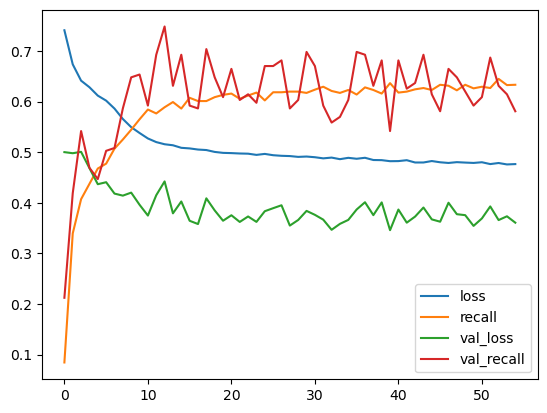

In [92]:
loss_df.plot()
plt.show()

In [93]:
y_pred = model4.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 3ms/step
[[1117   77]
 [ 140  166]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1194
           1       0.68      0.54      0.60       306

    accuracy                           0.86      1500
   macro avg       0.79      0.74      0.76      1500
weighted avg       0.85      0.86      0.85      1500



47/47 [==============================] - 0s 4ms/step


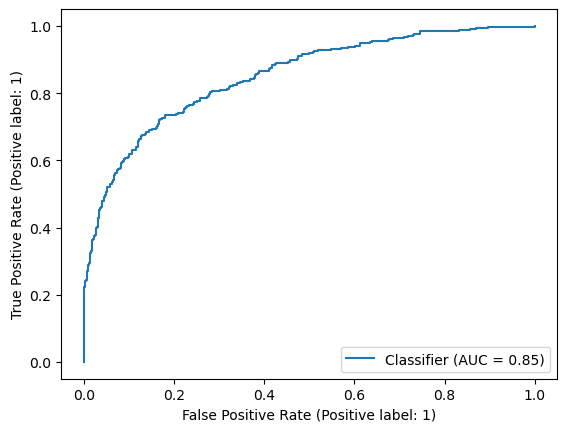

In [94]:
y_pred_proba = model4.predict(X_test_transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [95]:
roc_auc_score(y_test, y_pred_proba)

0.8507296832747615

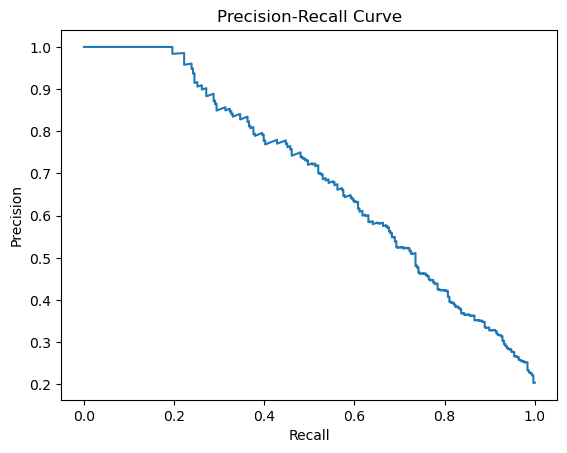

In [96]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#### Monitor the "val_recall" as metric

In [97]:
tf.random.set_seed(seed)

model5 = Sequential()
model5.add(Dense(32, activation="relu", input_dim=X_train_transformed.shape[1]))
model5.add(Dense(18, activation="relu"))
model5.add(Dense(9, activation="relu"))
model5.add(Dense(6, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model5.compile(optimizer=opt, loss="binary_crossentropy", metrics=[tf.keras.metrics.Recall()])

In [98]:
checkpoint = EarlyStopping(monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [99]:
model5.fit(X_train_transformed, y_train,validation_data=(X_val_transformed, y_val), epochs=1000, batch_size=30,class_weight=class_weights,callbacks=[checkpoint])

Epoch 1/1000
255/255 [==============================] - 4s 6ms/step - loss: 0.7305 - recall: 0.0380 - val_loss: 0.4991 - val_recall: 0.0838
Epoch 2/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.6898 - recall: 0.2919 - val_loss: 0.5089 - val_recall: 0.4302
Epoch 3/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.6460 - recall: 0.4562 - val_loss: 0.5007 - val_recall: 0.5978
Epoch 4/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.6204 - recall: 0.5058 - val_loss: 0.4755 - val_recall: 0.5698
Epoch 5/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.6030 - recall: 0.5329 - val_loss: 0.4200 - val_recall: 0.4246
Epoch 6/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.5884 - recall: 0.5515 - val_loss: 0.4342 - val_recall: 0.5754
Epoch 7/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.5683 - recall: 0.5664 - val_loss: 0.4138 - val_recall: 0.5363
Epoch 8/1000
255/255

In [100]:
loss_df = pd.DataFrame(model5.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.730478,0.038015,0.499118,0.083799
1,0.689751,0.291881,0.508911,0.430168
2,0.646027,0.456186,0.500740,0.597765
3,0.620367,0.505799,0.475481,0.569832
4,0.603009,0.532861,0.420029,0.424581


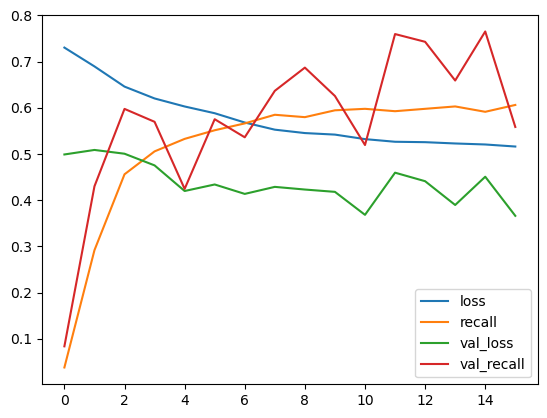

In [101]:
loss_df.plot()
plt.show()

In [102]:
loss, recall = model5.evaluate(X_test_transformed, y_test)
print("Loss:", loss)
print("recall:", recall)


47/47 [==============================] - 0s 3ms/step - loss: 0.4882 - recall: 0.1144
Loss: 0.4881863594055176
recall: 0.11437908560037613


In [103]:
y_pred = model5.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 3ms/step
[[1156   38]
 [ 271   35]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1194
           1       0.48      0.11      0.18       306

    accuracy                           0.79      1500
   macro avg       0.64      0.54      0.53      1500
weighted avg       0.74      0.79      0.74      1500



47/47 [==============================] - 0s 3ms/step


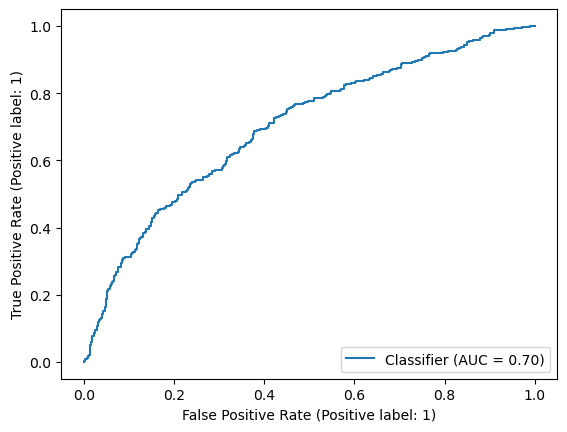

In [104]:
y_pred_proba = model5.predict(X_test_transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [105]:
roc_auc_score(y_test, y_pred_proba)

0.699647474847002

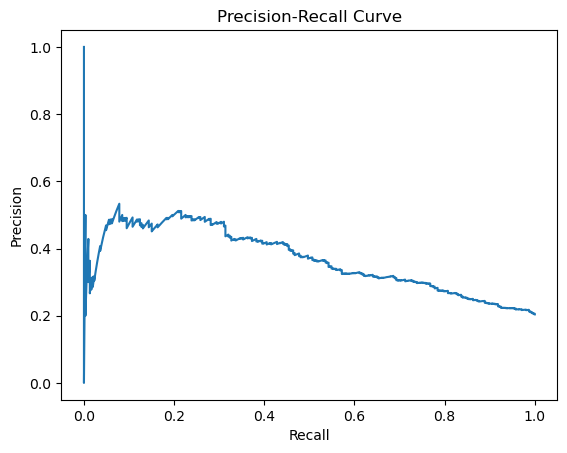

In [106]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#### another way for val_recall

In [107]:
tf.random.set_seed(seed)

model8 = Sequential()
model8.add(Dense(6, activation="relu", input_dim=X_train_transformed.shape[1]))
model8.add(Dense(6, activation="relu"))
model8.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model8.compile(loss='binary_crossentropy', optimizer='adam', metrics=[ "Recall"])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_recall', patience=3, mode='max', verbose=1)

# Train the model
model8.fit(X_train_transformed, y_train,validation_data=(X_val_transformed, y_val),epochs=1000, batch_size=30,class_weight=class_weights, callbacks=[early_stopping])


Epoch 1/1000
255/255 [==============================] - 2s 4ms/step - loss: 0.7391 - recall: 0.1823 - val_loss: 0.5208 - val_recall: 0.1899
Epoch 2/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.7086 - recall: 0.2674 - val_loss: 0.5129 - val_recall: 0.2849
Epoch 3/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.6931 - recall: 0.3254 - val_loss: 0.5213 - val_recall: 0.4078
Epoch 4/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.6812 - recall: 0.3698 - val_loss: 0.5135 - val_recall: 0.3966
Epoch 5/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.6705 - recall: 0.3930 - val_loss: 0.4998 - val_recall: 0.3799
Epoch 6/1000
255/255 [==============================] - 1s 3ms/step - loss: 0.6612 - recall: 0.4001 - val_loss: 0.4855 - val_recall: 0.3687
Epoch 6: early stopping


In [108]:
loss_df = pd.DataFrame(model8.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.739115,0.182345,0.520849,0.189944
1,0.708601,0.267397,0.512893,0.284916
2,0.693085,0.325387,0.521251,0.407821
3,0.681205,0.369845,0.513535,0.396648
4,0.670461,0.393041,0.499850,0.379888


In [109]:
loss,recall = model8.evaluate(X_test_transformed, y_test)
print("Loss:", loss)
print("Recall:", recall)

47/47 [==============================] - 0s 3ms/step - loss: 0.4763 - recall: 0.3725
Loss: 0.4763432741165161
Recall: 0.37254902720451355


In [110]:
y_pred = model8.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 3ms/step
[[1076  118]
 [ 192  114]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1194
           1       0.49      0.37      0.42       306

    accuracy                           0.79      1500
   macro avg       0.67      0.64      0.65      1500
weighted avg       0.78      0.79      0.78      1500



47/47 [==============================] - 0s 3ms/step


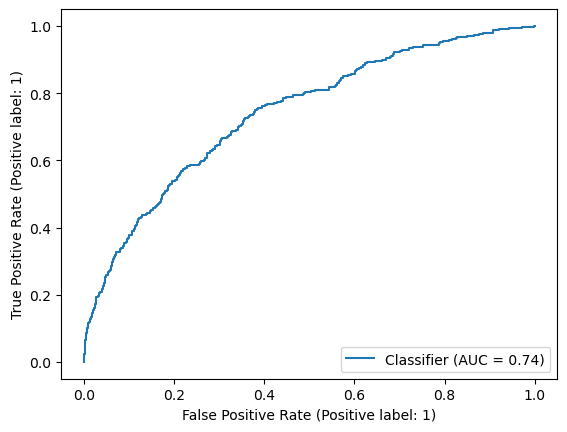

In [111]:
y_pred_proba = model8.predict(X_test_transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [112]:
roc_auc_score(y_test, y_pred_proba)

0.7406011539177368

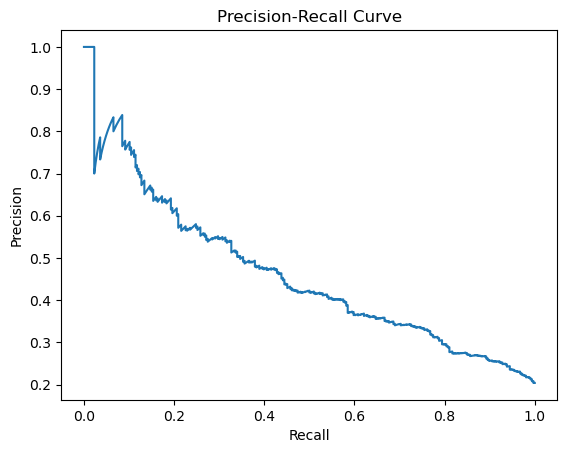

In [113]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Optuna

In [114]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)


In [115]:
trial_metric = "Recall"
batch_size = 30
tf.random.set_seed(42)


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 1, 150)
    n_units2 = trial.suggest_int("n_units2", 1, 150)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model6 = Sequential()
    model6.add(Dense(n_units1, input_dim=X_train_transformed.shape[1], activation="relu"))
    model6.add(Dense(n_units2, activation="relu"))
    model6.add(Dense(1, activation="sigmoid"))
    model6.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model6 = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.001, 5)
    w1 = trial.suggest_loguniform("w1", 0.001, 5)
    
    model6.fit(
        X_train_transformed,
        y_train,
        validation_data=(X_val_transformed, y_val),
        batch_size=batch_size,
        epochs=600,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model6.evaluate(X_test_transformed, y_test, verbose=0)[1]
    return score

In [116]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
study.best_params

[I 2023-10-30 21:58:29,865] A new study created in memory with name: no-name-4af0261c-797d-419b-ac94-74e3405ef396


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 21:58:49,685] Trial 0 finished with value: 0.5326797366142273 and parameters: {'n_units1': 15, 'n_units2': 97, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0017045317323429296, 'w0': 0.004140498736405674, 'w1': 0.007599255250207621}. Best is trial 0 with value: 0.5326797366142273.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-30 21:59:16,126] Trial 1 finished with value: 0.1666666716337204 and parameters: {'n_units1': 138, 'n_units2': 66, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.000478632211435193, 'w0': 3.4127729342821773, 'w1': 0.05962076222033857}. Best is trial 0 with value: 0.5326797366142273.


Restoring model weights from the end of the best epoch: 24.
Epoch 39: early stopping


[I 2023-10-30 21:59:54,381] Trial 2 finished with value: 0.8954248428344727 and parameters: {'n_units1': 129, 'n_units2': 99, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00031182547687418066, 'w0': 0.0022274706710396575, 'w1': 0.10049749524762787}. Best is trial 2 with value: 0.8954248428344727.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-10-30 22:00:20,583] Trial 3 finished with value: 0.7908496856689453 and parameters: {'n_units1': 21, 'n_units2': 74, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 2.264926580660793e-05, 'w0': 0.0023418136072474176, 'w1': 0.028839279081775242}. Best is trial 2 with value: 0.8954248428344727.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 22:00:38,630] Trial 4 finished with value: 0.3921568691730499 and parameters: {'n_units1': 65, 'n_units2': 97, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 4.517821940958159e-05, 'w0': 0.11187623927907744, 'w1': 0.03239461300217196}. Best is trial 2 with value: 0.8954248428344727.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 22:00:56,513] Trial 5 finished with value: 0.17973856627941132 and parameters: {'n_units1': 103, 'n_units2': 74, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0695247308188806, 'w0': 2.2630218264526585, 'w1': 0.08365190808671548}. Best is trial 2 with value: 0.8954248428344727.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 22:01:12,673] Trial 6 finished with value: 0.38562092185020447 and parameters: {'n_units1': 135, 'n_units2': 3, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.03479066722791709, 'w0': 1.9397357653137415, 'w1': 1.5251662938059332}. Best is trial 2 with value: 0.8954248428344727.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 22:01:28,671] Trial 7 finished with value: 0.2647058963775635 and parameters: {'n_units1': 8, 'n_units2': 105, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.00027487206509314556, 'w0': 0.10072581137165668, 'w1': 0.0020242610772022627}. Best is trial 2 with value: 0.8954248428344727.


Restoring model weights from the end of the best epoch: 45.
Epoch 60: early stopping


[I 2023-10-30 22:02:27,353] Trial 8 finished with value: 0.16013072431087494 and parameters: {'n_units1': 2, 'n_units2': 37, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.010831288408469232, 'w0': 0.8116285423029705, 'w1': 0.0016842974540478787}. Best is trial 2 with value: 0.8954248428344727.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 22:02:42,927] Trial 9 finished with value: 0.40522876381874084 and parameters: {'n_units1': 133, 'n_units2': 3, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0821716276980569, 'w0': 3.6549251941810645, 'w1': 3.7840134670622865}. Best is trial 2 with value: 0.8954248428344727.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 22:02:59,399] Trial 10 finished with value: 0.7450980544090271 and parameters: {'n_units1': 91, 'n_units2': 138, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.003222119389034623, 'w0': 0.0012866490861404695, 'w1': 0.38274558807600595}. Best is trial 2 with value: 0.8954248428344727.


Restoring model weights from the end of the best epoch: 24.
Epoch 39: early stopping


[I 2023-10-30 22:03:35,192] Trial 11 finished with value: 0.8627451062202454 and parameters: {'n_units1': 49, 'n_units2': 132, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.0524013353932519e-05, 'w0': 0.007652650870964466, 'w1': 0.22813665263742167}. Best is trial 2 with value: 0.8954248428344727.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-10-30 22:03:59,974] Trial 12 finished with value: 0.8692810535430908 and parameters: {'n_units1': 47, 'n_units2': 149, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 6.517636004569248e-05, 'w0': 0.008575538883816021, 'w1': 0.28639662007093347}. Best is trial 2 with value: 0.8954248428344727.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 22:04:15,559] Trial 13 finished with value: 0.898692786693573 and parameters: {'n_units1': 46, 'n_units2': 149, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00010800582995579664, 'w0': 0.008012330921389487, 'w1': 0.46441445776621443}. Best is trial 13 with value: 0.898692786693573.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 22:04:34,631] Trial 14 finished with value: 0.8725489974021912 and parameters: {'n_units1': 109, 'n_units2': 115, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00020858339896888967, 'w0': 0.02480989295873917, 'w1': 0.9142239990975373}. Best is trial 13 with value: 0.898692786693573.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-30 22:05:00,197] Trial 15 finished with value: 0.8921568393707275 and parameters: {'n_units1': 77, 'n_units2': 44, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00012178861401884016, 'w0': 0.001215544856664585, 'w1': 0.10248173812160571}. Best is trial 13 with value: 0.898692786693573.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 22:05:19,341] Trial 16 finished with value: 0.8921568393707275 and parameters: {'n_units1': 39, 'n_units2': 122, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0007057782691122802, 'w0': 0.01649680262315545, 'w1': 0.8738549506697579}. Best is trial 13 with value: 0.898692786693573.


Restoring model weights from the end of the best epoch: 32.
Epoch 47: early stopping


[I 2023-10-30 22:06:03,553] Trial 17 finished with value: 0.8660130500793457 and parameters: {'n_units1': 122, 'n_units2': 89, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 9.537164857467365e-05, 'w0': 0.003105594950031966, 'w1': 0.1889896133456591}. Best is trial 13 with value: 0.898692786693573.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-10-30 22:06:29,044] Trial 18 finished with value: 0.8104575276374817 and parameters: {'n_units1': 71, 'n_units2': 149, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00028992680440294185, 'w0': 0.03454936656067482, 'w1': 0.5244417791059185}. Best is trial 13 with value: 0.898692786693573.


Restoring model weights from the end of the best epoch: 14.
Epoch 29: early stopping


[I 2023-10-30 22:06:56,301] Trial 19 finished with value: 0.9444444179534912 and parameters: {'n_units1': 34, 'n_units2': 41, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0008571739738409699, 'w0': 0.0010040322706716576, 'w1': 2.998991969137854}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 22:07:12,447] Trial 20 finished with value: 0.9346405267715454 and parameters: {'n_units1': 34, 'n_units2': 31, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00114028650450381, 'w0': 0.0010339387244967413, 'w1': 3.9124378872693493}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 22:07:31,954] Trial 21 finished with value: 0.9411764740943909 and parameters: {'n_units1': 30, 'n_units2': 23, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.001238605655673806, 'w0': 0.0010552011690495202, 'w1': 4.3703168176599645}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 14.
Epoch 29: early stopping


[I 2023-10-30 22:07:59,490] Trial 22 finished with value: 0.9444444179534912 and parameters: {'n_units1': 30, 'n_units2': 24, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0014061265707761101, 'w0': 0.0013809959906686377, 'w1': 4.538322680432611}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 22:08:20,263] Trial 23 finished with value: 0.9313725233078003 and parameters: {'n_units1': 28, 'n_units2': 16, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.002879174174601428, 'w0': 0.001104798882576045, 'w1': 4.456494657721507}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-10-30 22:08:49,336] Trial 24 finished with value: 0.9215686321258545 and parameters: {'n_units1': 53, 'n_units2': 47, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0008249315433848101, 'w0': 0.004473631190352557, 'w1': 2.1613310485476136}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 22:09:18,136] Trial 25 finished with value: 0.9084967374801636 and parameters: {'n_units1': 26, 'n_units2': 19, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0049407334807336145, 'w0': 0.002174403990623059, 'w1': 1.9570880438931437}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 22:09:40,333] Trial 26 finished with value: 0.9281045794487 and parameters: {'n_units1': 11, 'n_units2': 57, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.001479616429690177, 'w0': 0.0019920888166743513, 'w1': 4.882754882956229}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 22:10:07,427] Trial 27 finished with value: 0.9248365759849548 and parameters: {'n_units1': 62, 'n_units2': 25, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0007001213431123427, 'w0': 0.0038010055779934626, 'w1': 1.8956305603518835}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 22:10:36,113] Trial 28 finished with value: 0.8856208920478821 and parameters: {'n_units1': 83, 'n_units2': 13, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.005842985604843899, 'w0': 0.0015877877035951362, 'w1': 0.9743582066078126}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-30 22:11:11,436] Trial 29 finished with value: 0.9117646813392639 and parameters: {'n_units1': 16, 'n_units2': 55, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0017373028704229419, 'w0': 0.004337734760023753, 'w1': 2.690513002035878}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-10-30 22:11:42,125] Trial 30 finished with value: 0.8954248428344727 and parameters: {'n_units1': 37, 'n_units2': 29, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0017645752079185027, 'w0': 0.004968289565248267, 'w1': 1.3169349918209203}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-10-30 22:12:13,821] Trial 31 finished with value: 0.9346405267715454 and parameters: {'n_units1': 33, 'n_units2': 35, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0010694075777025376, 'w0': 0.0010587519856560758, 'w1': 3.097444153327937}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-10-30 22:12:37,271] Trial 32 finished with value: 0.9248365759849548 and parameters: {'n_units1': 58, 'n_units2': 28, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0004806992505594833, 'w0': 0.0010778914551130233, 'w1': 4.846875123792904}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 22:13:00,887] Trial 33 finished with value: 0.9183006286621094 and parameters: {'n_units1': 40, 'n_units2': 47, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.001097385588630694, 'w0': 0.0022373032010176096, 'w1': 2.7912844187409314}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 22:13:23,974] Trial 34 finished with value: 0.9117646813392639 and parameters: {'n_units1': 21, 'n_units2': 61, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0004301292679841293, 'w0': 0.0018474620047680248, 'w1': 2.884173869096039}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 22:13:46,838] Trial 35 finished with value: 0.9379084706306458 and parameters: {'n_units1': 29, 'n_units2': 11, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0005365387735990307, 'w0': 0.003224602695521046, 'w1': 4.958690440756181}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 24.
Epoch 39: early stopping


[I 2023-10-30 22:14:37,754] Trial 36 finished with value: 0.8856208920478821 and parameters: {'n_units1': 149, 'n_units2': 11, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0005252657990818923, 'w0': 0.0029106100813604567, 'w1': 1.301217400112496}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 22:15:02,948] Trial 37 finished with value: 0.8888888955116272 and parameters: {'n_units1': 19, 'n_units2': 7, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0021033691625983756, 'w0': 0.001758277816296214, 'w1': 0.6724289558981634}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 23.
Epoch 38: early stopping


[I 2023-10-30 22:15:53,666] Trial 38 finished with value: 0.9281045794487 and parameters: {'n_units1': 6, 'n_units2': 18, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00018535523526564047, 'w0': 0.0031567520809121217, 'w1': 1.558390974816157}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 22:16:20,850] Trial 39 finished with value: 0.8954248428344727 and parameters: {'n_units1': 29, 'n_units2': 38, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0005734057258341687, 'w0': 0.001686124143508832, 'w1': 2.233907761584343}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 27.
Epoch 42: early stopping


[I 2023-10-30 22:17:12,359] Trial 40 finished with value: 0.9084967374801636 and parameters: {'n_units1': 14, 'n_units2': 82, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0003584058211096102, 'w0': 0.005055406809005037, 'w1': 3.184902474988541}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 15.
Epoch 30: early stopping


[I 2023-10-30 22:17:48,259] Trial 41 finished with value: 0.9117646813392639 and parameters: {'n_units1': 43, 'n_units2': 25, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0009576821331582834, 'w0': 0.0010146842263273016, 'w1': 4.45338006338124}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-30 22:18:19,597] Trial 42 finished with value: 0.898692786693573 and parameters: {'n_units1': 24, 'n_units2': 1, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0014593044375584088, 'w0': 0.0024139517606428756, 'w1': 4.959894092324}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-10-30 22:18:52,574] Trial 43 finished with value: 0.8856208920478821 and parameters: {'n_units1': 33, 'n_units2': 34, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0009762699475066349, 'w0': 0.0015890075709973053, 'w1': 1.4547577290925853}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 22:19:17,712] Trial 44 finished with value: 0.8954248428344727 and parameters: {'n_units1': 55, 'n_units2': 21, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.002556610813031056, 'w0': 0.001019020463581461, 'w1': 3.0937799840301716}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 9.
Epoch 24: early stopping


[I 2023-10-30 22:19:48,609] Trial 45 finished with value: 0.8954248428344727 and parameters: {'n_units1': 36, 'n_units2': 41, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0003660266222114581, 'w0': 0.0026855859116929758, 'w1': 2.0447227034656392}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 22:20:13,297] Trial 46 finished with value: 0.898692786693573 and parameters: {'n_units1': 6, 'n_units2': 51, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0012424474531828149, 'w0': 0.0014850439399969478, 'w1': 3.3827632847473827}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 19.
Epoch 34: early stopping


[I 2023-10-30 22:20:55,276] Trial 47 finished with value: 0.8856208920478821 and parameters: {'n_units1': 47, 'n_units2': 67, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0038676253993670433, 'w0': 0.006537291299975836, 'w1': 1.12081645362914}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-10-30 22:21:22,077] Trial 48 finished with value: 0.8921568393707275 and parameters: {'n_units1': 20, 'n_units2': 9, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.008492954865850052, 'w0': 0.0027815129047901984, 'w1': 1.71557200223717}. Best is trial 19 with value: 0.9444444179534912.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 22:21:41,936] Trial 49 finished with value: 0.898692786693573 and parameters: {'n_units1': 1, 'n_units2': 35, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.002105576874795228, 'w0': 0.0014888696084846896, 'w1': 3.5405114066426333}. Best is trial 19 with value: 0.9444444179534912.


{'n_units1': 34,
 'n_units2': 41,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.0008571739738409699,
 'w0': 0.0010040322706716576,
 'w1': 2.998991969137854}

In [117]:
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model7 = Sequential()
model7.add(Dense(unit1, activation="relu"))
model7.add(Dense(unit2, activation="relu"))
model7.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model7.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model7.fit(
    X_train_transformed,
    y_train,
    validation_data=(X_val_transformed, y_val),
    batch_size=30,
    epochs=1000,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/1000
255/255 [==============================] - 2s 6ms/step - loss: 0.4830 - recall: 6.4433e-04 - val_loss: 0.4843 - val_recall: 0.0000e+00
Epoch 2/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.4581 - recall: 0.0219 - val_loss: 0.4695 - val_recall: 0.0112
Epoch 3/1000
255/255 [==============================] - 1s 5ms/step - loss: 0.4434 - recall: 0.0947 - val_loss: 0.4580 - val_recall: 0.1564
Epoch 4/1000
255/255 [==============================] - 1s 5ms/step - loss: 0.4315 - recall: 0.1476 - val_loss: 0.4468 - val_recall: 0.2123
Epoch 5/1000
255/255 [==============================] - 1s 4ms/step - loss: 0.4240 - recall: 0.1959 - val_loss: 0.4423 - val_recall: 0.1285
Epoch 6/1000
255/255 [==============================] - 1s 5ms/step - loss: 0.4192 - recall: 0.2268 - val_loss: 0.4355 - val_recall: 0.1564
Epoch 7/1000
255/255 [==============================] - 1s 5ms/step - loss: 0.4143 - recall: 0.2584 - val_loss: 0.4285 - val_recall: 0.2346
Epoch 8/1000

In [118]:
loss_df = pd.DataFrame(model7.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.483036,0.000644,0.484271,0.000000
1,0.458071,0.021907,0.469481,0.011173
2,0.443380,0.094716,0.457954,0.156425
3,0.431462,0.147552,0.446762,0.212290
4,0.423957,0.195876,0.442293,0.128492


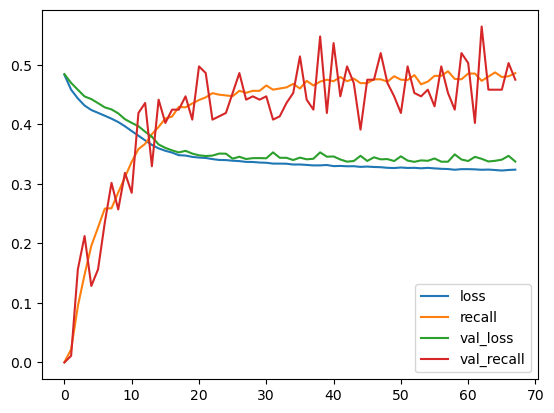

In [119]:
loss_df.plot()
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [120]:
y_pred = model7.predict(X_test_transformed) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 3ms/step
[[1151   43]
 [ 163  143]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1194
           1       0.77      0.47      0.58       306

    accuracy                           0.86      1500
   macro avg       0.82      0.72      0.75      1500
weighted avg       0.85      0.86      0.85      1500



47/47 [==============================] - 0s 3ms/step


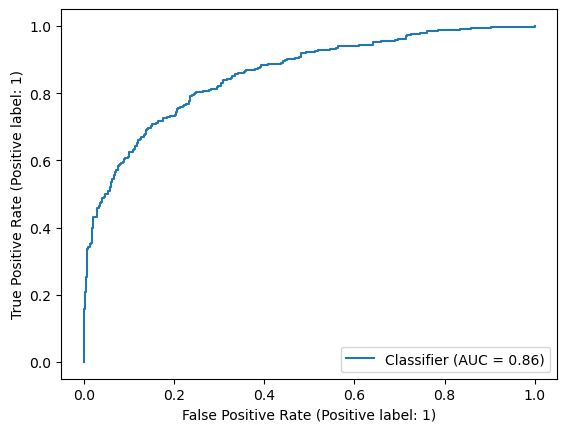

In [121]:
y_pred_proba = model7.predict(X_test_transformed)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

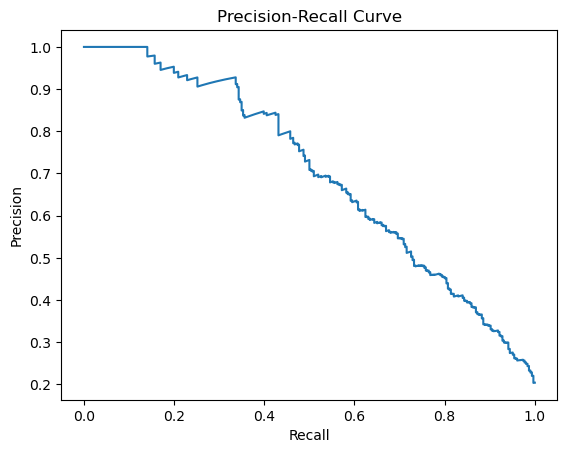

In [122]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Final Model and Model Deployment

In [135]:
import joblib


In [136]:
joblib.dump(column_trans, 'column_trans.pkl')


['column_trans.pkl']

In [137]:
joblib.dump(pipe_model, 'pipe_model.pkl')


['pipe_model.pkl']

In [138]:
model3.save('best_model.h5')

In [139]:
column_trans1 = joblib.load('column_trans.pkl')
pipe_model1 = joblib.load('pipe_model.pkl')
best_model1 = tf.keras.models.load_model('best_model.h5')

## Prediction

In [140]:
# input_sample = np.array([[584, "Spain", "Female", 67,3,87650.42,2,1,0,35423.87]])  # Example input sample

In [141]:
input_sample = pd.DataFrame([[584, "Spain", "Female", 67, 3, 87650.42, 2, 1, 0, 35423.87]],
                            columns=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
                                     'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])

In [142]:
input_sample

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,584,Spain,Female,67,3,87650.42,2,1,0,35423.87


In [143]:
# Transform the new data using the loaded transformer and pipeline
# Apply the column transformer to the input sample
input_sample_transformed = column_trans1.transform(input_sample)



In [144]:

# Apply the pipeline to the transformed input sample
# input_sample_processed = pipe_model1.transform(input_sample_transformed)



In [145]:
# Make predictions using the best model
predictions = best_model1.predict(input_sample_transformed)> 0.5


1/1 [==============================] - 0s 116ms/step


In [146]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___